In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # INSTALL NLTK
# !pip install nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# import the dataset
df = pd.read_excel(r"C:\Users\hp\Desktop\Data Science YouThrive\survey_data.xlsx")

# copy of the dataset
df_copy = df.copy()
df.head()

,age_group,country,education_level,occupation,income_range,purchase_sustainable_brand,categories,sustainable_categories (clothing_and_fashion),sustainable_categories (food_and_beverages),sustainable_categories (beauty_and_personal_care),...,awareness_source (online_product_reviews),awareness_source (others),sustainable_brand_perception,positive_experience,negative_experience,trust_factors,sustainable_emotions,price_justification_factor,research_likelihood,additional_comments
0,25–34,United Kingdom,Master’s degree,Student,£1000–£3000,Yes,"Clothing and fashion, Beauty and personal care...",Yes,No,Yes,...,Yes,No,Great product with a good quality,They give good vibes,Sometimes low customer service,I trust brand sustainability because of what t...,Good product,The product last longer,4,I love top notch products
1,25–34,Nigeria,Bachelor’s degree,Banker,Prefer not to say,Yes,"Food and beverages, Electronics, Household or ...",No,Yes,No,...,Yes,No,Brands that prioritize environmental and socia...,The brand prioritize waste management and emph...,No consumer outreach,No consumer's encouragement on the need of sus...,"Hope, trust and responsibility.",Their impact on the ecosystem,4,Insightful research. Keep it up.
2,25–34,United Kingdom,Master’s degree,Site security,£3100–£5000,Yes,Clothing and fashion,Yes,No,No,...,No,No,Provide quality service or item,one of the fashion brand,Bought a cloth on a site and it was low quality,Not getting the quality I envisioned,Good,Quality assurance,5,"Sustainable brands should be quality ,durable ..."
3,18–24,Nigeria,Bachelor’s degree,Student,Prefer not to say,No,"Clothing and fashion, Food and beverages, Beau...",Yes,Yes,Yes,...,Yes,Yes,Reliable products,Conspiracy,Late Shipping,Consistency,Admirable,Cus it’s reliable,5,Lovely
4,35–44,United Kingdom,Secondary / High school,Store assistant,£1000–£3000,Yes,Clothing and fashion,Yes,No,No,...,No,No,Daily use brands,Good,Non quality,Quality,Quality,Because of the name and the acceptance,5,Designers


## Data Cleaning

In [4]:
# Checking for the null values
df.isna().sum()

age_group                                                                 0
country                                                                   0
education_level                                                           0
occupation                                                               96
income_range                                                              0
purchase_sustainable_brand                                                0
categories                                                                0
sustainable_categories (clothing_and_fashion)                             0
sustainable_categories (food_and_beverages)                               0
sustainable_categories (beauty_and_personal_care)                         0
sustainable_categories (electronics)                                      0
sustainable_categories (household_or_cleaning_product)                    0
sustainable_categories (automobile_and_energy)                            0
sustainable_

In [5]:
# checking the dataset for duplicates rows and displaying them
duplicates = df[df.duplicated()]

#show duplicates
duplicates

,age_group,country,education_level,occupation,income_range,purchase_sustainable_brand,categories,sustainable_categories (clothing_and_fashion),sustainable_categories (food_and_beverages),sustainable_categories (beauty_and_personal_care),...,awareness_source (online_product_reviews),awareness_source (others),sustainable_brand_perception,positive_experience,negative_experience,trust_factors,sustainable_emotions,price_justification_factor,research_likelihood,additional_comments
22,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Durability,The great quality and longevity of the product,5,Building sustainable brands might be hard but ...
23,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Durability,The great quality and longevity of the product,5,Building sustainable brands might be hard but ...
24,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Durability,The great quality and longevity of the product,5,Building sustainable brands might be hard but ...
25,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Durability,The great quality and longevity of the product,5,Building sustainable brands might be hard but ...
26,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Durability,The great quality and longevity of the product,5,Building sustainable brands might be hard but ...
27,45–54,Canada,Doctorate / PhD,Doctor,£5100 and above,Yes,Other,No,No,No,...,Yes,No,More price but great product,Great customer service,Most sustainable brands never disappoint,A trust brand that give continuous value for y...,Durability,The great quality and longevity of the product,5,Building sustainable brands might be hard but ...


In [6]:
# removing the duplicates in the dataset

df = df.drop_duplicates()
print("The shape before removing duplicates :",df_copy.shape)
print("The shape after removing duplicates :",df.shape)

The shape before removing duplicates : (291, 31)
The shape after removing duplicates : (285, 31)


## Exploratory Data Analysis

In [7]:
# age_group Distribution
age_group_Freq = df['age_group'].value_counts().reset_index()
# rename column 
age_group_Freq.columns = ['age_group','Frequency']
# add percentage column
age_group_Freq['Percentage'] = (age_group_Freq['Frequency'] / age_group_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
age_group_Freq['Percentage'] = age_group_Freq['Percentage'].round(2)
age_group_Freq

,age_group,Frequency,Percentage
0,25–34,130,45.61
1,18–24,117,41.05
2,35–44,33,11.58
3,45–54,4,1.40
4,55 and above,1,0.35


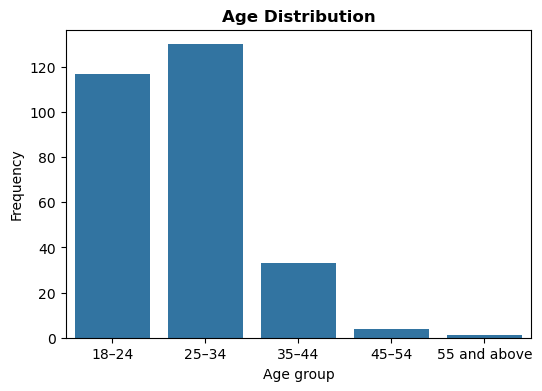

In [8]:
# AgeDistribution

plt.figure(figsize=(6,4))
order = ['18–24', '25–34', '35–44', '45–54', '55 and above']

#Axis
sns.barplot(x = age_group_Freq['age_group'], 
            y = age_group_Freq['Frequency'],
             data=age_group_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Age Distribution",fontweight='bold')
plt.xlabel("Age group")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Country Distribution
country_Freq = df['country'].value_counts().reset_index()
# rename column 
country_Freq.columns = ['country','Frequency']
# add percentage column
country_Freq['Percentage'] = (country_Freq['Frequency'] / country_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
country_Freq['Percentage'] = country_Freq['Percentage'].round(2)
country_Freq

,country,Frequency,Percentage
0,United Kingdom,153,53.68
1,Nigeria,77,27.02
2,Canada,12,4.21
3,Ukraine,4,1.40
4,Ghana,4,1.40
5,USA,4,1.40
6,Ireland,3,1.05
7,Scotland,3,1.05
8,Togo,3,1.05
9,Italy,2,0.70


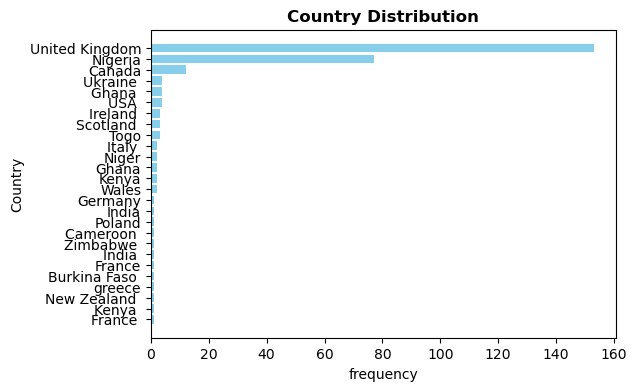

In [10]:
# Country Distribution
x = country_Freq['country']
y = country_Freq['Frequency']

plt.figure(figsize=(6,4))
# create horizontal barchart
plt.barh(x,y,color='skyblue')

# Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# Add title 
plt.title("Country Distribution",fontweight='bold')

plt.xlabel("frequency")
plt.ylabel("Country")

# show plot
plt.show()

In [11]:
#Education Level Distribution
Edu_Freq = df['education_level'].value_counts().reset_index()
# rename column 
Edu_Freq.columns = ['education','Frequency']
# add percentage column
Edu_Freq['Percentage'] = (Edu_Freq['Frequency'] / Edu_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
Edu_Freq['Percentage'] = Edu_Freq['Percentage'].round(2)
Edu_Freq

,education,Frequency,Percentage
0,Bachelor’s degree,154,54.04
1,Secondary / High school,85,29.82
2,Master’s degree,36,12.63
3,Other,5,1.75
4,Doctorate / PhD,5,1.75


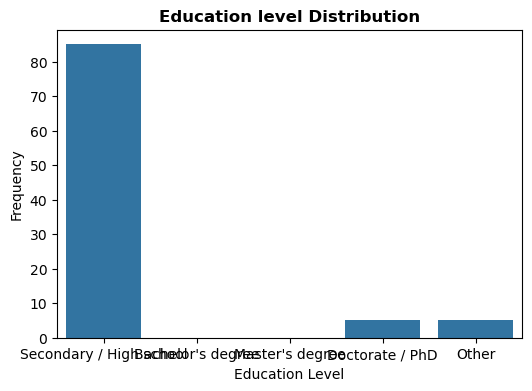

In [12]:
# Education level Distribution Chart

plt.figure(figsize=(6,4))
order = ['Secondary / High school', "Bachelor's degree", "Master's degree", 'Doctorate / PhD', 'Other']

#Axis
sns.barplot(x = Edu_Freq['education'], 
            y = Edu_Freq['Frequency'],
            
             data=age_group_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Education level Distribution", fontweight='bold')
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Income level Distribution
income_Freq = df['income_range'].value_counts().reset_index()
# rename column 
income_Freq.columns = ['income','Frequency']
# add percentage column
income_Freq['Percentage'] = (income_Freq['Frequency'] / income_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
income_Freq['Percentage'] = income_Freq['Percentage'].round(2)
income_Freq

,income,Frequency,Percentage
0,£1000–£3000,156,54.74
1,Below £1000,59,20.70
2,£3100–£5000,48,16.84
3,Prefer not to say,16,5.61
4,£5100 and above,6,2.11


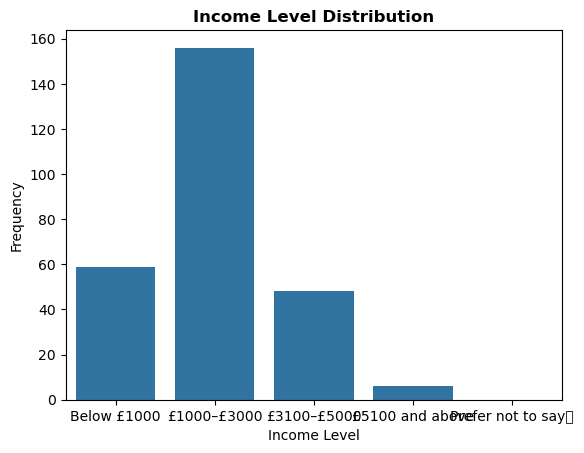

In [14]:
# Income level Distribution

# plt.figure(figsize=(6,4))
order = ['Below £1000', '£1000–£3000', '£3100–£5000', '£5100 and above', 'Prefer not to say	']

#Axis
sns.barplot(x = income_Freq['income'], 
            y = income_Freq['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Income Level Distribution",fontweight='bold')
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.show()

In [15]:
# purchase sustainable brand distribution
brand_Freq = df['purchase_sustainable_brand'].value_counts().reset_index()
# rename column 
brand_Freq.columns = ['Purchase_sustainable','Frequency']
# add percentage column
brand_Freq['Percentage'] = (brand_Freq['Frequency'] / brand_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
brand_Freq['Percentage'] = brand_Freq['Percentage'].round(2)
brand_Freq

,Purchase_sustainable,Frequency,Percentage
0,Yes,246,86.32
1,Not sure,26,9.12
2,No,13,4.56


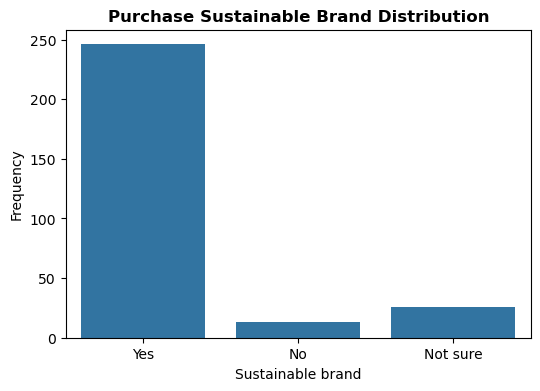

In [16]:
# Purchase sustainable brand Distribution

plt.figure(figsize=(6,4))
order = ['Yes', 'No', 'Not sure']

#Axis
sns.barplot(x = brand_Freq['Purchase_sustainable'], 
            y = brand_Freq['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Purchase Sustainable Brand Distribution",fontweight='bold')
plt.xlabel("Sustainable brand")
plt.ylabel("Frequency")
plt.show()

In [17]:
# purchase frequency distribution
purchase_Freq = df['purchase_frequency'].value_counts().reset_index()
# rename column 
purchase_Freq.columns = ['Purchase_frequency','Frequency']
# add percentage column
purchase_Freq['Percentage'] = (purchase_Freq['Frequency'] / purchase_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
purchase_Freq['Percentage'] = purchase_Freq['Percentage'].round(2)
purchase_Freq

,Purchase_frequency,Frequency,Percentage
0,Often,145,50.88
1,Sometimes,62,21.75
2,Always,47,16.49
3,Rarely,27,9.47
4,Never,4,1.40


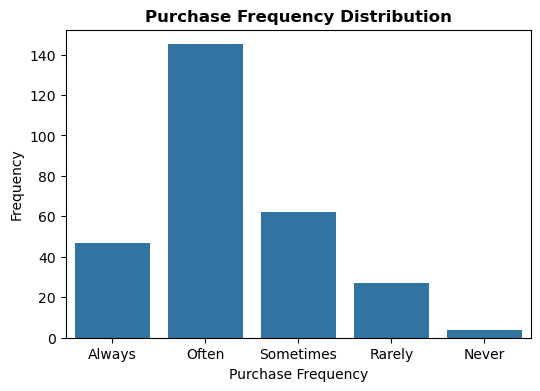

In [18]:
# Purchase frequency Distribution

plt.figure(figsize=(6,4))
order = ['Always', 'Often', 'Sometimes', 'Rarely', 'Never']

#Axis
sns.barplot(x = purchase_Freq['Purchase_frequency'], 
            y = purchase_Freq['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Purchase Frequency Distribution",fontweight='bold')
plt.xlabel("Purchase Frequency")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Select all sustainable category columns
sustainable_cols = [col for col in df.columns if col.startswith('sustainable_categories')]
# Create frequency and percentage table
results = pd.DataFrame()

for col in sustainable_cols:
    yes_count = (df[col] == "Yes").sum()
    no_count = (df[col] == "No").sum()
    total = yes_count + no_count
    
    results.loc[col, "Frequency"] = yes_count
    # results.loc[col, "No_Count"] = no_count
    results.loc[col, "Percentage"] = round((yes_count / total) * 100, 2) if total > 0 else 0

results = results.reset_index().rename(columns={
    "index": "Sustainable Category",
    # "Frequency": "Frequency",
    # "Percentage": "Percentage"
})
results

,Sustainable Category,Frequency,Percentage
0,sustainable_categories (clothing_and_fashion),241.0,84.56
1,sustainable_categories (food_and_beverages),217.0,76.14
2,sustainable_categories (beauty_and_personal_care),232.0,81.40
3,sustainable_categories (electronics),219.0,76.84
4,sustainable_categories (household_or_cleaning_...,216.0,75.79
5,sustainable_categories (automobile_and_energy),179.0,62.81
6,sustainable_categories (others),17.0,5.96


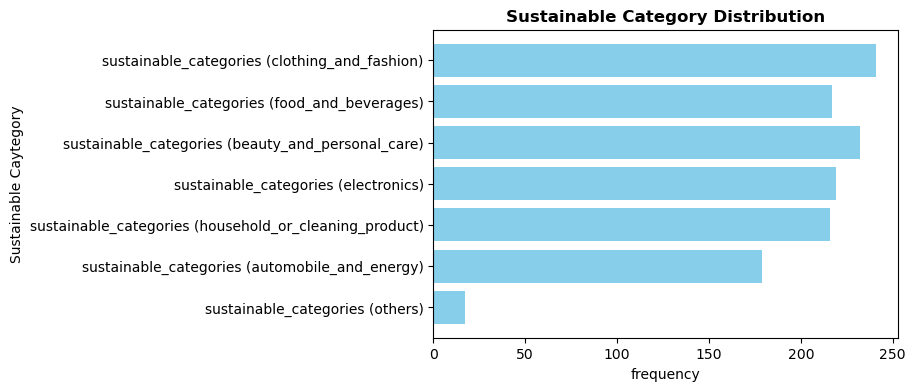

In [20]:
# Sustainable category distribution
x = results['Sustainable Category']
y = results['Frequency']

plt.figure(figsize=(6,4))
# # create horizontal barchart
plt.barh(x,y,color='skyblue')

# # Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# # Add title 
plt.title("Sustainable Category Distribution",fontweight='bold')

plt.xlabel("frequency")
plt.ylabel("Sustainable Caytegory")

# show plot
plt.show()

In [21]:
awareness_cols = [col for col in df.columns if col.startswith('awareness_source')]
# Create frequency and percentage table
awareness = pd.DataFrame()

for col in awareness_cols:
    yes_count = (df[col] == "Yes").sum()
    no_count = (df[col] == "No").sum()
    total = yes_count + no_count
    
    awareness.loc[col, "Frequency"] = yes_count
    # results.loc[col, "No_Count"] = no_count
    awareness.loc[col, "Percentage"] = round((yes_count / total) * 100, 2) if total > 0 else 0

awareness = awareness.reset_index().rename(columns={
    "index": "Awareness source",
    # "Frequency": "Frequency",
    # "Percentage": "Percentage"
})
awareness

,Awareness source,Frequency,Percentage
0,awareness_source (social_media),231.0,81.05
1,awareness_source (product_packaging_or_labelling),216.0,75.79
2,awareness_source (news_or_documentaries),207.0,72.63
3,awareness_source (friends_or_families),218.0,76.49
4,awareness_source (brand_advertisement or websi...,226.0,79.30
5,awareness_source (online_product_reviews),214.0,75.09
6,awareness_source (others),5.0,1.75


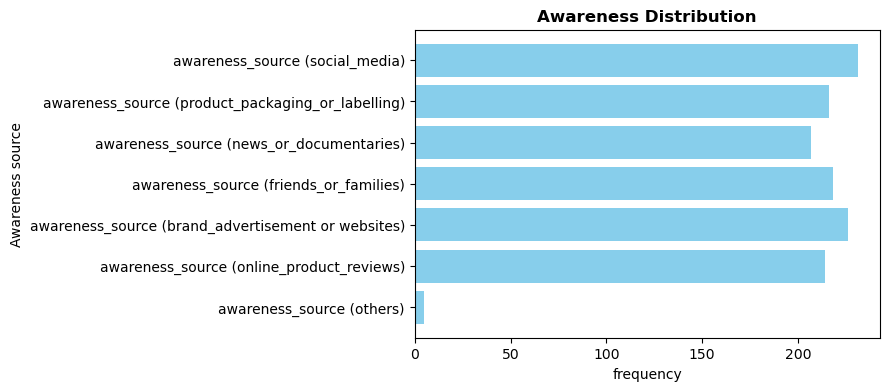

In [22]:
# Awareness source distribution
x = awareness['Awareness source']
y = awareness['Frequency']

plt.figure(figsize=(6,4))
# # create horizontal barchart
plt.barh(x,y,color='skyblue')

# # Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# # Add title 
plt.title("Awareness Distribution",fontweight='bold')

plt.xlabel("frequency")
plt.ylabel("Awareness source")

# show plot
plt.show()

In [23]:
# sustainable_brand_perception
sia = SentimentIntensityAnalyzer()
text = df['sustainable_brand_perception']
def clean_text(text):
    if pd.isna(text):
        return ""
    return str(text).strip()
# Clean the column
df['sustainable_brand_perception_clean'] = df['sustainable_brand_perception'].apply(clean_text)
#  Apply VADER sentiment scoring 
df['sentiment_scores'] = df['sustainable_brand_perception_clean'].apply(lambda x: sia.polarity_scores(x))

# Extract individual sentiment metrics
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral']  = df['sentiment_scores'].apply(lambda x: x['neu'])
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# --- Categorize into sentiment classes ---
def categorize_sentiment(c):
    if c >= 0.05:
        return "Positive"
    elif c <= -0.05:
        return "Negative"
    else:
        return "Neutral"
df['sentiment_category'] = df['compound'].apply(categorize_sentiment)

In [24]:
#display brand perception and sentiment
df[['sustainable_brand_perception', 'sentiment_category']].head()

,sustainable_brand_perception,sentiment_category
0,Great product with a good quality,Positive
1,Brands that prioritize environmental and socia...,Neutral
2,Provide quality service or item,Neutral
3,Reliable products,Neutral
4,Daily use brands,Neutral


In [25]:
# sentiment category distribution
sent_Freq = df['sentiment_category'].value_counts().reset_index()
# rename column 
sent_Freq.columns = ['Sentiment category','Frequency']
# add percentage column
sent_Freq['Percentage'] = (sent_Freq['Frequency'] / sent_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
sent_Freq['Percentage'] = sent_Freq['Percentage'].round(2)
sent_Freq

,Sentiment category,Frequency,Percentage
0,Positive,149,52.28
1,Neutral,118,41.40
2,Negative,18,6.32


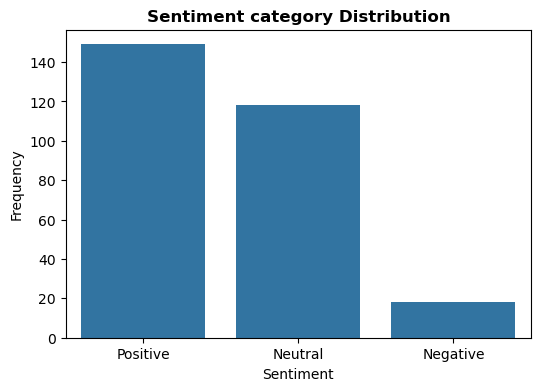

In [26]:
#  Sentiment category Distribution
plt.figure(figsize=(6,4))

#Axis
sns.barplot(x = sent_Freq['Sentiment category'], 
            y = sent_Freq['Frequency']
)

plt.title("Sentiment category Distribution",fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

#### Test of association between socioeconmic characteristics and perception of sustainable brands.

In [27]:
# Age group and perception of sustainable brands
table = pd.crosstab(df['age_group'], df['sentiment_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sentiment_category  Negative  Neutral  Positive
age_group                                      
18–24                      8       41        68
25–34                      8       58        64
35–44                      2       17        14
45–54                      0        1         3
55 and above               0        1         0

Chi-square Statistic: 6.271667462729343
P-value: 0.616829933710999
Degrees of Freedom: 8
Not Significant


In [28]:
# education level and perception of sustainable brands
table = pd.crosstab(df['education_level'], df['sentiment_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sentiment_category       Negative  Neutral  Positive
education_level                                     
Bachelor’s degree              11       62        81
Doctorate / PhD                 0        2         3
Master’s degree                 2       17        17
Other                           0        2         3
Secondary / High school         5       35        45

Chi-square Statistic: 1.5056812233562182
P-value: 0.992613085017763
Degrees of Freedom: 8
Not Significant


In [29]:
# occupation and perception of sustainable brands
table = pd.crosstab(df['occupation'], df['sentiment_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sentiment_category    Negative  Neutral  Positive
occupation                                       
Admin Assistant              0        0         1
Apprenticeship               0        0         1
Assistant supervisor         0        1         0
Banker                       0        2         1
Boxer                        0        2         0
...                        ...      ...       ...
personal assistant           0        1         0
saloon manager               0        0         1
student                      0        1         0
student                      0        0         1
teacher                      0        0         1

[92 rows x 3 columns]

Chi-square Statistic: 162.8207900453507
P-value: 0.8431887370069137
Degrees of Freedom: 182
Not Significant


In [30]:
# income range and perception of sustainable brands
table = pd.crosstab(df['income_range'], df['sentiment_category'])
chi2, p, dof, expected = chi2_contingency(table)

#Show cross tabulation
print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sentiment_category  Negative  Neutral  Positive
income_range                                   
Below £1000                2       22        35
Prefer not to say          0        9         7
£1000–£3000               13       64        79
£3100–£5000                2       19        27
£5100 and above            1        4         1

Chi-square Statistic: 8.709113098792498
P-value: 0.3674259296047189
Degrees of Freedom: 8
Not Significant


In [31]:
# country and perception of sustainable brands
table = pd.crosstab(df['country'], df['sentiment_category'])
chi2, p, dof, expected = chi2_contingency(table)
#Show cross tabulation
print(table)

# Display results
print("\nChi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
# print("\nExpected Frequencies:\n", expected)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sentiment_category  Negative  Neutral  Positive
country                                        
Burkina Faso               0        1         0
Cameroon                   0        1         0
Canada                     1        4         7
France                     0        0         1
France                     0        0         1
Germany                    0        1         0
Ghana                      0        2         0
Ghana                      0        1         3
India                      0        0         1
India                      0        0         1
Ireland                    0        0         3
Italy                      0        2         0
Kenya                      1        1         0
Kenya                      1        0         0
New Zealand                0        0         1
Niger                      0        1         1
Nigeria                    1       38        38
Poland                     0        1         0
Scotland                   0        2   

In [32]:
# Extract two columns 
price_col = df[['price_justification_factor','sentiment_category']].copy()
price_col.head()

,price_justification_factor,sentiment_category
0,The product last longer,Positive
1,Their impact on the ecosystem,Neutral
2,Quality assurance,Neutral
3,Cus it’s reliable,Neutral
4,Because of the name and the acceptance,Neutral


In [33]:
# Price justification factor
sia = SentimentIntensityAnalyzer()
text = price_col['price_justification_factor']
def clean_text(text):
    if pd.isna(text):
        return ""
    return str(text).strip()
# Clean the column
price_col['price_justification_factor_clean'] = price_col['price_justification_factor'].apply(clean_text)
#  Apply VADER sentiment scoring 
price_col['price_sentiment_scores'] = price_col['price_justification_factor_clean'].apply(lambda x: sia.polarity_scores(x))

# Extract individual sentiment metrics
price_col['negative'] = price_col['price_sentiment_scores'].apply(lambda x: x['neg'])
price_col['neutral']  = price_col['price_sentiment_scores'].apply(lambda x: x['neu'])
price_col['positive'] = price_col['price_sentiment_scores'].apply(lambda x: x['pos'])
price_col['compound'] = price_col['price_sentiment_scores'].apply(lambda x: x['compound'])

# --- Categorize into sentiment classes ---
def categorize_sentiment(c):
    if c >= 0.05:
        return "Positive"
    elif c <= -0.05:
        return "Negative"
    else:
        return "Neutral"
price_col['price_sentiment_category'] = price_col['compound'].apply(categorize_sentiment)

In [34]:
# display price justification and price sentiment
price_col[['price_justification_factor', 'price_sentiment_category']].head()

,price_justification_factor,price_sentiment_category
0,The product last longer,Neutral
1,Their impact on the ecosystem,Neutral
2,Quality assurance,Positive
3,Cus it’s reliable,Neutral
4,Because of the name and the acceptance,Positive


In [35]:
# price_sentiment_distribution

Pr_sent = price_col['price_sentiment_category'].value_counts().reset_index()
# rename column 
Pr_sent.columns = ['Price Sentiment category','Frequency']
# add percentage column
Pr_sent['Percentage'] = (Pr_sent['Frequency'] / Pr_sent['Frequency'].sum()) * 100
# converting percentage to 2 d.p
Pr_sent['Percentage'] = Pr_sent['Percentage'].round(2)
Pr_sent

,Price Sentiment category,Frequency,Percentage
0,Neutral,250,87.72
1,Positive,33,11.58
2,Negative,2,0.70


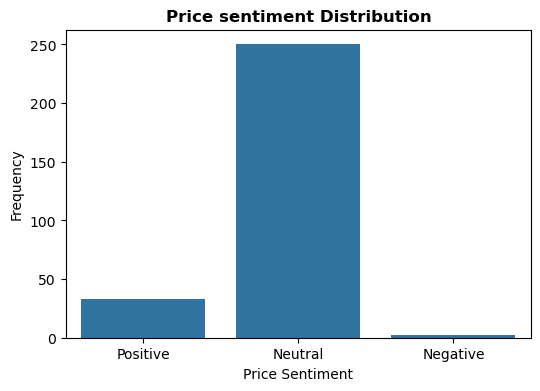

In [36]:
# Price Sentiment Distribution
plt.figure(figsize=(6,4))
order = ['Positive', 'Neutral', 'Negative']

#Axis
sns.barplot(x = Pr_sent['Price Sentiment category'], 
            y = Pr_sent['Frequency'],
            
             data=income_Freq.reset_index(),  # convert index to column if needed
                order=order
)

plt.title("Price sentiment Distribution",fontweight='bold')
plt.xlabel("Price Sentiment")
plt.ylabel("Frequency")
plt.show()

In [37]:
# Test of association between price justification and sustainable_brand_perception
table = pd.crosstab(price_col['price_sentiment_category'], price_col['sentiment_category'])
chi2, p, dof, expected = chi2_contingency(table)
#Show cross tabulation
print(table)

# Display results
print("\nChi-square Statistic:", chi2.round(2))
print("P-value:", p.round(2))
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("Significant")
else: 
    print("Not Significant")

sentiment_category        Negative  Neutral  Positive
price_sentiment_category                             
Negative                         0        2         0
Neutral                         17      103       130
Positive                         1       13        19

Chi-square Statistic: 3.7
P-value: 0.45
Degrees of Freedom: 4
Not Significant


In [38]:
# Converting sentiment category to binary where Positive = 1 and Neutral and Negative 0
def convert_sentiment_num(value):
    if value == "Positive":
        return 1
    else:
        return 0

df['sentiment_binary_num'] = df['sentiment_category'].apply(convert_sentiment_num)

In [39]:
df.head()

,age_group,country,education_level,occupation,income_range,purchase_sustainable_brand,categories,sustainable_categories (clothing_and_fashion),sustainable_categories (food_and_beverages),sustainable_categories (beauty_and_personal_care),...,research_likelihood,additional_comments,sustainable_brand_perception_clean,sentiment_scores,negative,neutral,positive,compound,sentiment_category,sentiment_binary_num
0,25–34,United Kingdom,Master’s degree,Student,£1000–£3000,Yes,"Clothing and fashion, Beauty and personal care...",Yes,No,Yes,...,4,I love top notch products,Great product with a good quality,"{'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound...",0.0,0.3,0.7,0.7906,Positive,1
1,25–34,Nigeria,Bachelor’s degree,Banker,Prefer not to say,Yes,"Food and beverages, Electronics, Household or ...",No,Yes,No,...,4,Insightful research. Keep it up.,Brands that prioritize environmental and socia...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000,Neutral,0
2,25–34,United Kingdom,Master’s degree,Site security,£3100–£5000,Yes,Clothing and fashion,Yes,No,No,...,5,"Sustainable brands should be quality ,durable ...",Provide quality service or item,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000,Neutral,0
3,18–24,Nigeria,Bachelor’s degree,Student,Prefer not to say,No,"Clothing and fashion, Food and beverages, Beau...",Yes,Yes,Yes,...,5,Lovely,Reliable products,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000,Neutral,0
4,35–44,United Kingdom,Secondary / High school,Store assistant,£1000–£3000,Yes,Clothing and fashion,Yes,No,No,...,5,Designers,Daily use brands,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0000,Neutral,0


In [40]:
sent_Freq = df['sentiment_binary_num'].value_counts().reset_index()
# rename column 
sent_Freq.columns = ['Sentiment category','Frequency']
# add percentage column
sent_Freq['Percentage'] = (sent_Freq['Frequency'] / sent_Freq['Frequency'].sum()) * 100
# converting percentage to 2 d.p
sent_Freq['Percentage'] = sent_Freq['Percentage'].round(2)
sent_Freq

,Sentiment category,Frequency,Percentage
0,1,149,52.28
1,0,136,47.72


#### Predict whether respondents have positive sentiment (1) or negative sentiment (0) based on: 
- Age group
- Income
- Education Level

In [42]:
# Check frequency distribution to identify sparse groups
print("\nAge Group Distribution vs Sentiment:")
print(pd.crosstab(df['age_group'], df['sentiment_binary_num']))

print("\nIncome Range Distribution vs Sentiment:")
print(pd.crosstab(df['income_range'], df['sentiment_binary_num']))

print("\nEducation_level Distribution vs Sentiment:")
print(pd.crosstab(df['education_level'], df['sentiment_binary_num']))

# Recombine sparse categories for stability
df['age_group_recat'] = df['age_group'].replace({
    '45–54': '45 and above',
    '55 and above': '45 and above'
})

df['income_range_recat'] = df['income_range'].replace({
    '£3100–£5000' : '£3100 and above' ,
    '£5100 and above': '£3100 and above'
})

# Convert variables to numerical
X = pd.get_dummies(df[['age_group_recat', 'income_range_recat','education_level']], drop_first=True)
X = X.astype(int)

y = df['sentiment_binary_num']

# Add constant
#X = sm.add_constant(X)

# Fitlogistic regression 
model = sm.Logit(y, X).fit_regularized(method='l1')

# Show results
print(model.summary())


Age Group Distribution vs Sentiment:
sentiment_binary_num   0   1
age_group                   
18–24                 49  68
25–34                 66  64
35–44                 19  14
45–54                  1   3
55 and above           1   0

Income Range Distribution vs Sentiment:
sentiment_binary_num   0   1
income_range                
Below £1000           24  35
Prefer not to say      9   7
£1000–£3000           77  79
£3100–£5000           21  27
£5100 and above        5   1

Education_level Distribution vs Sentiment:
sentiment_binary_num      0   1
education_level                
Bachelor’s degree        73  81
Doctorate / PhD           2   3
Master’s degree          19  17
Other                     2   3
Secondary / High school  40  45
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6877116094061732
            Iterations: 63
            Function evaluations: 63
            Gradient evaluations: 63
                            Logit Reg